# IPL 2021 Match Score Prediction Contest Organized by IIT Madras Online B.Sc. Programme Team

## Few Deep Learning Models

In [1]:
# Imports required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

import pickle

In [2]:
# Sets Pandas option to show all columns

pd.set_option('display.max_columns', None)

#### Downloads dataset

In [3]:
# Deletes the following files before downloading the same files

!rm Data/README.txt Data/ll_matches.csv Data/ipl_csv2.zip

# Downloads the dataset from cricsheet.org/downloads (overwrites the file if exists)

!wget https://cricsheet.org/downloads/ipl_csv2.zip -O Data/ipl_csv2.zip

# Unzips the data (overwrites existing files having same name)

!unzip -o -d Data Data/ipl_csv2.zip all_matches.csv README.txt

rm: cannot remove 'README.txt': No such file or directory
rm: cannot remove 'all_matches.csv': No such file or directory
rm: cannot remove 'ipl_csv2.zip': No such file or directory
--2021-04-30 07:25:12--  https://cricsheet.org/downloads/ipl_csv2.zip
Resolving cricsheet.org (cricsheet.org)... 64.90.49.16
Connecting to cricsheet.org (cricsheet.org)|64.90.49.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3334466 (3.2M) [application/zip]
Saving to: ‘Data/ipl_csv2.zip’

Data/ipl_csv2.zip   100%[===================>]   3.18M   561KB/s    in 8.5s    

2021-04-30 07:25:22 (385 KB/s) - ‘Data/ipl_csv2.zip’ saved [3334466/3334466]

Archive:  Data/ipl_csv2.zip
  inflating: Data/README.txt         
  inflating: Data/all_matches.csv    


#### Loads dataset and checks how it looks

In [4]:
# Load data for all matches

data = pd.read_csv("Data/all_matches.csv")

/home/pradip/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Checks top few rows of the data

data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checks bottom rows of the data

data.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
199671,1254082,2021,2021-04-29,"Narendra Modi Stadium, Ahmedabad",2,15.5,Delhi Capitals,Kolkata Knight Riders,RR Pant,MP Stoinis,PJ Cummins,0,0,NaN,NaN,NaN,NaN,NaN,caught,RR Pant,NaN,NaN
199672,1254082,2021,2021-04-29,"Narendra Modi Stadium, Ahmedabad",2,15.6,Delhi Capitals,Kolkata Knight Riders,SO Hetmyer,MP Stoinis,PJ Cummins,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199673,1254082,2021,2021-04-29,"Narendra Modi Stadium, Ahmedabad",2,16.1,Delhi Capitals,Kolkata Knight Riders,MP Stoinis,SO Hetmyer,M Prasidh Krishna,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199674,1254082,2021,2021-04-29,"Narendra Modi Stadium, Ahmedabad",2,16.2,Delhi Capitals,Kolkata Knight Riders,MP Stoinis,SO Hetmyer,M Prasidh Krishna,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199675,1254082,2021,2021-04-29,"Narendra Modi Stadium, Ahmedabad",2,16.3,Delhi Capitals,Kolkata Knight Riders,MP Stoinis,SO Hetmyer,M Prasidh Krishna,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Converts all string data into lowercase

data.venue = data.venue.str.lower()
data.batting_team = data.batting_team.str.lower()
data.bowling_team = data.bowling_team.str.lower()
data.striker = data.striker.str.lower()
data.non_striker = data.non_striker.str.lower()
data.bowler = data.bowler.str.lower()

In [8]:
# Checks for missing values

data.isna().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     193635
noballs                   198868
byes                      199147
legbyes                   196489
penalty                   199674
wicket_type               189854
player_dismissed          189854
other_wicket_type         199676
other_player_dismissed    199676
dtype: int64

#### Checks for venues for duplicates with slightly different names, if any, and updates the rows with the same venue names accordingly

In [9]:
data.venue.value_counts().sort_index()

arun jaitley stadium                                     3356
arun jaitley stadium, delhi                               477
barabati stadium                                         1695
brabourne stadium                                        2469
brabourne stadium, mumbai                                 250
buffalo park                                              715
de beers diamond oval                                     726
dr dy patil sports academy                               3993
dr. y.s. rajasekhara reddy aca-vdca cricket stadium      3037
dubai international cricket stadium                      8080
eden gardens                                            17988
feroz shah kotla                                        13950
green park                                                921
himachal pradesh cricket association stadium             2159
holkar cricket stadium                                   1965
jsca international stadium complex                       1671
kingsmea

In [10]:
# Updates these venues that are mentioned in different names with same name

data.venue[data.venue.str.contains("arun jaitley", 
                                                 case=False)] = "arun jaitley stadium"

data.venue[data.venue.str.contains("brabourne", 
                                                 case=False)] = "brabourne stadium"

data.venue[data.venue.str.contains("chinnaswamy", 
                                                 case=False)] = "m. chinnaswamy stadium"

data.venue[data.venue.str.contains("chidambaram", 
                                                 case=False)] = "m. a. chidambaram stadium"

data.venue[data.venue.str.contains(r'narendra modi', 
                                                 case=False)] = "narendra modi stadium"

data.venue[data.venue.str.contains(r'punjab cricket|is bindra|inderjit singh bindra', 
                                                 case=False)] = "is bindra stadium"

data.venue[data.venue.str.contains("rajiv gandhi", 
                                                 case=False)] = "rajiv gandhi international cricket stadium"

data.venue[data.venue.str.contains("wankhede", 
                                                 case=False)] = "wankhede stadium"

/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from s

#### Checks for teams for duplicates with slightly different names, if any, and updates the rows with the same team names accordingly

In [11]:
data.batting_team.append(data.bowling_team).value_counts().sort_index()

chennai super kings            44147
deccan chargers                18073
delhi capitals                  9727
delhi daredevils               37511
gujarat lions                   7111
kings xi punjab                45129
kochi tuskers kerala            3196
kolkata knight riders          46871
mumbai indians                 50425
pune warriors                  10900
punjab kings                    1403
rajasthan royals               39554
rising pune supergiant          3828
rising pune supergiants         3195
royal challengers bangalore    47244
sunrisers hyderabad            31038
dtype: int64

In [12]:
# Updates team name from "Delhi Daredevils" with the new name "Delhi Capitals"

data.batting_team[data.batting_team.str.contains("delhi daredevils", case=False)] = "delhi capitals"
data.bowling_team[data.bowling_team.str.contains("delhi daredevils", case=False)] = "delhi capitals"

# Updates team name from "Kings XI Punjab" with the new name "Punjab Kings"

data.batting_team[data.batting_team.str.contains("kings xi punjab", case=False)] = "punjab kings"
data.bowling_team[data.bowling_team.str.contains("kings xi punjab", case=False)] = "punjab kings"

# Updates appropriate team name for "Rising Pune Supergiant"

data.batting_team[data.batting_team.str.contains("rising pune supergiants", case=False)] = "rising pune supergiant"
data.bowling_team[data.bowling_team.str.contains("rising pune supergiants", case=False)] = "rising pune supergiant"


/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/pradip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [13]:
# Inserts a new calculated column called "score_off_ball" which is a sum of values in 
# columns "runs_off_bat" and "extras" just after column "extras" to indicate contributing score off the ball
# to make calculating total score at the end of the match easy

data.insert(loc=13, column="score_off_ball", value=data.runs_off_bat + data.extras)

In [14]:
# Removes columsn that are not required

columns_required = ["match_id", "venue", "innings", "ball", "batting_team", "bowling_team", 
                    "striker", "non_striker", "bowler", "score_off_ball"]

data = data[columns_required]

In [15]:
# Considers only first 6 overs

data_6_overs = data[data.ball <= 6.0]

In [16]:
# Checks how the 6 overs data looks

data_6_overs

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,score_off_ball
0,335982,m. chinnaswamy stadium,1,0.1,kolkata knight riders,royal challengers bangalore,sc ganguly,bb mccullum,p kumar,1
1,335982,m. chinnaswamy stadium,1,0.2,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,0
2,335982,m. chinnaswamy stadium,1,0.3,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,1
3,335982,m. chinnaswamy stadium,1,0.4,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,0
4,335982,m. chinnaswamy stadium,1,0.5,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,0
...,...,...,...,...,...,...,...,...,...,...
199605,1254082,narendra modi stadium,2,5.2,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,0
199606,1254082,narendra modi stadium,2,5.3,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,0
199607,1254082,narendra modi stadium,2,5.4,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,0
199608,1254082,narendra modi stadium,2,5.5,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,1


#### Some statistics below to realize the trend

In [17]:
# Venue wise average innings runs after 6 overs

data_6_overs.groupby(
    ["venue", "match_id", "innings"]).score_off_ball.sum().reset_index().groupby(
        ["venue"]).score_off_ball.mean().sort_values(ascending=False)

venue
green park                                             55.000000
brabourne stadium                                      51.863636
holkar cricket stadium                                 51.722222
saurashtra cricket association stadium                 51.045455
is bindra stadium                                      48.428571
arun jaitley stadium                                   47.676471
feroz shah kotla                                       47.092437
sharjah cricket stadium                                47.027778
maharashtra cricket association stadium                46.795455
eden gardens                                           46.266234
kingsmead                                              45.933333
m. chinnaswamy stadium                                 45.428571
m. a. chidambaram stadium                              45.326087
supersport park                                        45.250000
wankhede stadium                                       45.190476
rajiv gandhi intern

In [18]:
# Batting team wise average innings runs after 6 overs

data_6_overs.groupby(["batting_team", "match_id", "innings"]).score_off_ball.sum().reset_index().groupby(
    ["batting_team"]).score_off_ball.mean().sort_values(ascending=False)

batting_team
gujarat lions                  50.290323
kochi tuskers kerala           48.571429
rising pune supergiant         47.433333
sunrisers hyderabad            46.574627
punjab kings                   45.766169
deccan chargers                45.560000
kolkata knight riders          45.399015
delhi capitals                 45.385366
chennai super kings            44.989189
mumbai indians                 44.429907
royal challengers bangalore    44.303922
rajasthan royals               44.053254
pune warriors                  42.111111
Name: score_off_ball, dtype: float64

In [19]:
# Striker's inning wise average scores after 6 overs

pd.set_option("display.max_rows", None)  # To view all the rows temporarily

data_6_overs.groupby(
    ["striker", "match_id", "innings"]).score_off_ball.sum().reset_index().groupby(
        ["striker"]).score_off_ball.mean().sort_values(ascending=False)

striker
ab mcdonald          31.000000
ankit sharma         27.000000
c madan              22.000000
ab agarkar           22.000000
a flintoff           21.000000
d padikkal           20.400000
mj lumb              20.250000
ca lynn              20.225000
dr smith             20.061538
anirudh singh        20.000000
da warner            19.978873
lmp simmons          19.931034
jm bairstow          19.884615
e lewis              19.866667
jc buttler           19.733333
ad hales             19.666667
ls livingstone       19.666667
ml hayden            19.303030
st jayasuriya        19.233333
ab barath            19.000000
shoaib malik         19.000000
ut khawaja           18.833333
ch gayle             18.755556
ac gilchrist         18.437500
q de kock            18.347222
kl rahul             18.289855
s sohal              18.117647
ch morris            18.000000
pk garg              18.000000
bj haddin            18.000000
r bishnoi            18.000000
sp narine            17.923077


In [20]:
pd.reset_option('display.max_rows')   # Resets to its default number of visible rows

In [21]:
# Resets its index

data_6_overs.reset_index(drop = True, inplace = True)

In [22]:
# Checks how the 6 overs data looks after reset index and with new column "score_off_ball"

data_6_overs

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,score_off_ball
0,335982,m. chinnaswamy stadium,1,0.1,kolkata knight riders,royal challengers bangalore,sc ganguly,bb mccullum,p kumar,1
1,335982,m. chinnaswamy stadium,1,0.2,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,0
2,335982,m. chinnaswamy stadium,1,0.3,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,1
3,335982,m. chinnaswamy stadium,1,0.4,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,0
4,335982,m. chinnaswamy stadium,1,0.5,kolkata knight riders,royal challengers bangalore,bb mccullum,sc ganguly,p kumar,0
...,...,...,...,...,...,...,...,...,...,...
62948,1254082,narendra modi stadium,2,5.2,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,0
62949,1254082,narendra modi stadium,2,5.3,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,0
62950,1254082,narendra modi stadium,2,5.4,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,0
62951,1254082,narendra modi stadium,2,5.5,delhi capitals,kolkata knight riders,s dhawan,pp shaw,pj cummins,1


In [23]:
# Creates initial innings group out of 6 overs to further add other innings related data into

innings = data_6_overs.groupby(
    ["match_id", "venue", "innings", "batting_team", "bowling_team"])

In [24]:
# Calculates the innings wise score at the end of 6 overs

innings_runs = innings.score_off_ball.sum()

innings_runs.name = "score_6_overs"

In [25]:
# Checks how the innings data looks like

innings_runs

match_id  venue                   innings  batting_team                 bowling_team               
335982    m. chinnaswamy stadium  1        kolkata knight riders        royal challengers bangalore    61
                                  2        royal challengers bangalore  kolkata knight riders          26
335983    is bindra stadium       1        chennai super kings          punjab kings                   53
                                  2        punjab kings                 chennai super kings            63
335984    feroz shah kotla        1        rajasthan royals             delhi capitals                 40
                                                                                                       ..
1254080   arun jaitley stadium    2        chennai super kings          sunrisers hyderabad            50
1254081   arun jaitley stadium    1        rajasthan royals             mumbai indians                 47
                                  2        mumbai in

In [26]:
# Resets the index of the group to flatten the grouped data

data_6_overs_agg = innings_runs.reset_index()

In [27]:
# Checks how the flattend innings wise grouped data looks

data_6_overs_agg

,match_id,venue,innings,batting_team,bowling_team,score_6_overs
0,335982,m. chinnaswamy stadium,1,kolkata knight riders,royal challengers bangalore,61
1,335982,m. chinnaswamy stadium,2,royal challengers bangalore,kolkata knight riders,26
2,335983,is bindra stadium,1,chennai super kings,punjab kings,53
3,335983,is bindra stadium,2,punjab kings,chennai super kings,63
4,335984,feroz shah kotla,1,rajasthan royals,delhi capitals,40
...,...,...,...,...,...,...
1705,1254080,arun jaitley stadium,2,chennai super kings,sunrisers hyderabad,50
1706,1254081,arun jaitley stadium,1,rajasthan royals,mumbai indians,47
1707,1254081,arun jaitley stadium,2,mumbai indians,rajasthan royals,49
1708,1254082,narendra modi stadium,1,kolkata knight riders,delhi capitals,45


In [28]:
# Encodes venues with one-hot encoding technique

venue_count = len(data_6_overs_agg.venue.unique())
venue_encoder = OneHotEncoder(handle_unknown='ignore')
venue_encoded = pd.DataFrame(venue_encoder.fit_transform(data_6_overs_agg[["venue"]]).toarray(),
                            columns=[("venue_" + str(i)) for i in range(venue_count)])

# Saves the encoder into persistent store for later use

with open("Models/Venue_Encoder.pickle", "wb") as f:
    pickle.dump(venue_encoder, f, pickle.HIGHEST_PROTOCOL)

# Joins the encoded venue columns with the dataset

data_6_overs_agg = data_6_overs_agg.join(venue_encoded).drop(["venue"], axis = 1)

In [29]:
# Encodes innings with one-hot encoding technique

innings_count = len(data_6_overs_agg.innings.unique())
innings_encoder = OneHotEncoder(handle_unknown='ignore')
innings_encoded = pd.DataFrame(innings_encoder.fit_transform(data_6_overs_agg[["innings"]]).toarray(),
                            columns=[("innings_" + str(i)) for i in range(innings_count)])

# Saves the encoder into persistent store for later use

with open("Models/Innings_Encoder.pickle", "wb") as f:
    pickle.dump(innings_encoder, f, pickle.HIGHEST_PROTOCOL)

# Joins the encoded innings columns with the dataset

data_6_overs_agg = data_6_overs_agg.join(innings_encoded).drop(["innings"], axis = 1)

In [30]:
# Now, encodes teams with one-hot encoding technique

team = data_6_overs_agg.batting_team.append(data_6_overs_agg.bowling_team).unique()
team_count = len(team)
team_encoder = OneHotEncoder(handle_unknown='ignore')
team_encoder.fit(pd.DataFrame(team))

batting_team_encoded = pd.DataFrame(team_encoder.transform(data_6_overs_agg[["batting_team"]]).toarray(),
                                    columns=[("batting_team_" + str(i)) for i in range(team_count)])

bowling_team_encoded = pd.DataFrame(team_encoder.transform(data_6_overs_agg[["bowling_team"]]).toarray(),
                                    columns=[("bowling_team_" + str(i)) for i in range(team_count)])

# Saves the encoder into persistent store for later use

with open("Models/Team_Encoder.pickle", "wb") as f:
    pickle.dump(team_encoder, f, pickle.HIGHEST_PROTOCOL)
    
# Joins the encoded team columns with the dataset

data_6_overs_agg = data_6_overs_agg.join(batting_team_encoded).drop(["batting_team"], axis = 1)
data_6_overs_agg = data_6_overs_agg.join(bowling_team_encoded).drop(["bowling_team"], axis = 1)

In [31]:
# Now, encodes players with one-hot encoding technique

player = data_6_overs.striker.append(
            data_6_overs.non_striker).append(data_6_overs.bowler).unique()
player_count = len(player)

player_encoder = OneHotEncoder(handle_unknown='ignore')

player_encoder.fit(pd.DataFrame(player))

# Saves the encoder into persistent store for later use

with open("Models/Player_Encoder.pickle", "wb") as f:
    pickle.dump(player_encoder, f, pickle.HIGHEST_PROTOCOL)

In [32]:
# Transforms both striker and non-striker

striker_encoded_array = player_encoder.transform(data_6_overs[["striker"]]).toarray()

non_striker_encoded_array = player_encoder.transform(data_6_overs[["non_striker"]]).toarray()

In [33]:
# Considers striker and non-striker as batsmen, creates a dataframe out of it,
# then joins with innings data to consider this batsmen information in the main dataset

data_6_overs_batsmen = data_6_overs[["match_id", "innings"]].join(
    pd.DataFrame(np.add(striker_encoded_array, non_striker_encoded_array),
                columns=[("batsman_" + str(i)) for i in range(player_count)]))

In [34]:
# Transforms bowlers and creates a dataframe out of it, and then joins with innings data to 
# consider this bowlers information in the main dataset

data_6_overs_bowlers = data_6_overs[["match_id", "innings"]].join(
    pd.DataFrame(player_encoder.transform(data_6_overs[["bowler"]]).toarray(),
                columns=[("bowler_" + str(i)) for i in range(player_count)]))

In [35]:
# Combines all the batsmen, both striker and non-striker innings wise, and
# resets index of the aggregation to get tabular data

batsmen_encoded = data_6_overs_batsmen.groupby(["match_id", "innings"]).max().reset_index()

# Drops columns "match_id" and "innings" as these columns already exist in aggregated dataset that this
# data will be joined with

batsmen_encoded.drop(["match_id", "innings"], inplace=True, axis=1)

In [36]:
# Combines all the bowlers innings wise and resets index of the aggregation to get tabular data

bowlers_encoded = data_6_overs_bowlers.groupby(["match_id", "innings"]).max().reset_index()

# Drops columns "match_id" and "innings" as these columns already exist in aggregated dataset that this
# data will be joined with

bowlers_encoded.drop(["match_id", "innings"], inplace=True, axis=1)

In [37]:
# Joins encoded batsmen and bowlers information with aggregated innings data 

data_6_overs_agg = data_6_overs_agg.join(batsmen_encoded)

data_6_overs_agg = data_6_overs_agg.join(bowlers_encoded)

In [38]:
# Checks how the final dataset the machine learning model will be trained on looks like

data_6_overs_agg

match_id  score_6_overs  venue_0  venue_1  venue_2  venue_3  venue_4  \
0       335982             61      0.0      0.0      0.0      0.0      0.0   
1       335982             26      0.0      0.0      0.0      0.0      0.0   
2       335983             53      0.0      0.0      0.0      0.0      0.0   
3       335983             63      0.0      0.0      0.0      0.0      0.0   
4       335984             40      0.0      0.0      0.0      0.0      0.0   
...        ...            ...      ...      ...      ...      ...      ...   
1705   1254080             50      1.0      0.0      0.0      0.0      0.0   
1706   1254081             47      1.0      0.0      0.0      0.0      0.0   
1707   1254081             49      1.0      0.0      0.0      0.0      0.0   
1708   1254082             45      0.0      0.0      0.0      0.0      0.0   
1709   1254082             67      0.0      0.0      0.0      0.0      0.0   

      venue_5  venue_6  venue_7  venue_8  venue_9  venue_10  venue_11  \
0         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
2         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
3         0.0      0.0      0.0      0.0      0.0       0.0       0.0   
4         0.0      0.0      0.0      0.0      1.0       0.0       0.0   
...       ...      ...      ...      ...      ...       ...       ...   
1705      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1706      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1707      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1708      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1709      0.0      0.0      0.0      0.0      0.0       0.0       0.0   

      venue_12  venue_13  venue_14  venue_15  venue_16  venue_17  venue_18  \
0          0.0       0.0       0.0       0.0       0.0       1.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       1.0       0.0   
2          0.0       1.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       1.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1705       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1706       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1707       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1708       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1709       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      venue_19  venue_20  venue_21  venue_22  venue_23  venue_24  venue_25  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1705       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1706       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1707       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1708       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
1709       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

      venue_26  venue_27  venue_28  venue_29  venue_30  venue_31  venue_32  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3     

## Let's now first build a Fully Connected Dense Neural Network model. 

In [39]:
# But, first removes the column "match_id" as it is not required for machine learning model

data_6_overs_agg.drop(["match_id"], axis=1, inplace=True)

In [40]:
# Converts DataFrame into 2D tensor

data_6_overs_agg_array = data_6_overs_agg.to_numpy()

In [41]:
# Seperates training labels

X_train, y_train = data_6_overs_agg_array[:,1:], data_6_overs_agg_array[:,0]

In [42]:
# Splits the available data into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True)

In [43]:
# Creates a sequential dense neural network model

model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))          

In [44]:
# Checks the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               148096    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 158,465
Trainable params: 158,465
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compiles the model

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [46]:
# Sets the number of epoch

epoch_count = 10

# Fits the model with training data and performs validation with validation data

history = model.fit(X_train, y_train, batch_size=4, epochs=epoch_count, validation_data=(X_test, y_test))

Epoch 1/10
342/342 [==============================] - 5s 12ms/step - loss: 759.7456 - mae: 21.3997 - val_loss: 139.7008 - val_mae: 9.2750
Epoch 2/10
342/342 [==============================] - 3s 10ms/step - loss: 133.3395 - mae: 9.1414 - val_loss: 137.9726 - val_mae: 9.1655
Epoch 3/10
342/342 [==============================] - 3s 10ms/step - loss: 102.7995 - mae: 7.8700 - val_loss: 127.5190 - val_mae: 8.8321
Epoch 4/10
342/342 [==============================] - 3s 9ms/step - loss: 92.8705 - mae: 7.4436 - val_loss: 133.2966 - val_mae: 9.1239
Epoch 5/10
342/342 [==============================] - 3s 8ms/step - loss: 81.7045 - mae: 6.7464 - val_loss: 125.6354 - val_mae: 8.8824
Epoch 6/10
342/342 [==============================] - 3s 8ms/step - loss: 77.9066 - mae: 6.5352 - val_loss: 128.8245 - val_mae: 9.0264
Epoch 7/10
342/342 [==============================] - 4s 11ms/step - loss: 73.0214 - mae: 6.3043 - val_loss: 134.4057 - val_mae: 9.0724
Epoch 8/10
342/342 [===========================

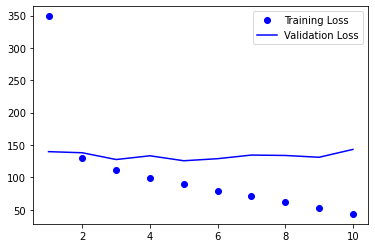

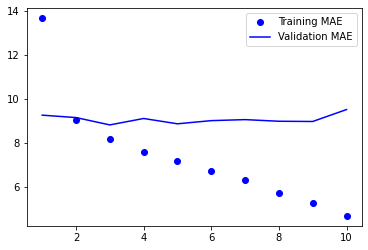

In [47]:
# Gets referene to model performance metrics over training and validation data

history = history.history

# Plots training and validation performance

plt.plot(range(1, epoch_count+1), history['loss'], "bo", label="Training Loss")
plt.plot(range(1, epoch_count+1), history['val_loss'], "b", label="Validation Loss")
plt.legend()
plt.xlabel = "Epochs"
plt.ylabel = "Loss"
plt.figure()

plt.plot(range(1, epoch_count+1), history['mae'], "bo", label="Training MAE")
plt.plot(range(1, epoch_count+1), history['val_mae'], "b", label="Validation MAE")
plt.legend()
plt.xlabel = "Epochs"
plt.ylabel = "Mean Absolute Error (MAE)"
plt.show()

In [48]:
# Checks for mean of validation loss

np.mean(history["val_mae"])

9.089410209655762

In [49]:
# Performs predictions on the test data

predictions = model.predict(X_test)

In [50]:
# Calculates mean absolute error for all predictions

mean_absolute_error(y_test, predictions)

9.530602212537799

In [51]:
# Now with validation and test performance analysed, let's train the model once again with all data so
# that the model can be used for real predictions

X_train, y_train = data_6_overs_agg_array[:,1:], data_6_overs_agg_array[:,0]

model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))   

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(X_train, y_train, batch_size=4, epochs=epoch_count)

Epoch 1/10
428/428 [==============================] - 4s 7ms/step - loss: 723.4388 - mae: 20.7810
Epoch 2/10
428/428 [==============================] - 3s 8ms/step - loss: 132.3799 - mae: 8.9017
Epoch 3/10
428/428 [==============================] - 4s 9ms/step - loss: 118.4760 - mae: 8.3242
Epoch 4/10
428/428 [==============================] - 4s 8ms/step - loss: 94.7466 - mae: 7.3571
Epoch 5/10
428/428 [==============================] - 4s 9ms/step - loss: 86.1924 - mae: 6.9816
Epoch 6/10
428/428 [==============================] - 5s 11ms/step - loss: 83.8770 - mae: 6.8284
Epoch 7/10
428/428 [==============================] - 5s 12ms/step - loss: 70.0911 - mae: 6.2356
Epoch 8/10
428/428 [==============================] - 4s 9ms/step - loss: 64.9990 - mae: 5.7977
Epoch 9/10
428/428 [==============================] - 4s 8ms/step - loss: 54.0985 - mae: 5.2847
Epoch 10/10
428/428 [==============================] - 3s 7ms/step - loss: 37.9428 - mae: 4.5002


In [52]:
# Saves the model into persistent store for later use

model.save("Models/Dense_ANN_Regressor")

INFO:tensorflow:Assets written to: Models/Dense_ANN_Regressor/assets


## From the above, the observed test data Mean Absolute Error (MAE) for this Dense Neural Network is around 10. Though it was expected that this model's test performance will outperform that of all other models implemented so far on these notebooks, but it could only beat test performance of Common Sense model (10.71) and Decision Tree model (11.12),  and scored less than score of Random Forest (9.70) and Gradient Boosted model (8.95)

## Scope of future work on this is 
### 1) to refer the dataset once again to check if any other preprocessing is required in order to get new feature(s) and/or optimize any existing feature(s), and
### 2) to try differ models both from shallow and deep learning techniques